In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('hair_loss.csv')
X = data.drop('hair_fall', axis=1)
y = data.hair_fall

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
# Hyperparameter-Raster erstellen
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# RandomForestClassifier initialisieren
rf_classifier = RandomForestClassifier()

# GridSearchCV initialisieren
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=3)

# GridSearchCV ausführen
grid_search.fit(X_train, y_train)

# Beste Parameter ausgeben
best_params = grid_search.best_params_
print("Beste Parameter:", best_params)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.170 total time=   3.3s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.170 total time=   3.3s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.170 total time=   3.3s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.168 total time=  16.5s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.169 total time=  16.2s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.170 total time=  16.5s
[CV 1/3] END criterion=gi

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth= 5, max_features='sqrt', n_estimators=100,min_samples_leaf=1, min_samples_split=2, criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 641,  191, 2014,  266,  168, 1756],
       [ 692,  168, 1910,  296,  181, 1777],
       [ 685,  200, 1872,  293,  172, 1704],
       [ 694,  199, 1887,  252,  172, 1789],
       [ 646,  184, 2016,  232,  160, 1774],
       [ 664,  177, 1931,  283,  160, 1794]])

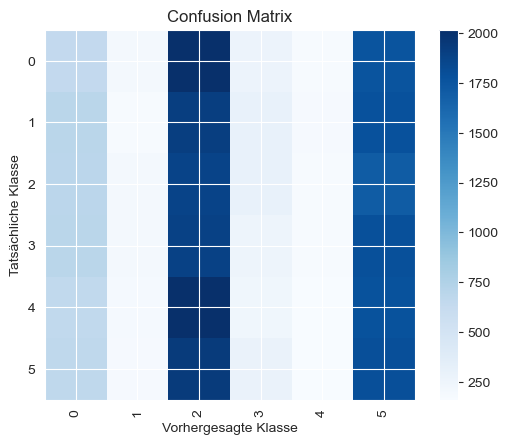

In [13]:
classes = np.unique(y_train)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xticks(rotation='vertical')

plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

In [14]:
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.16      0.13      0.14      5036
           1       0.15      0.03      0.05      5024
           2       0.16      0.38      0.23      4926
           3       0.16      0.05      0.08      4993
           4       0.16      0.03      0.05      5012
           5       0.17      0.36      0.23      5009

    accuracy                           0.16     30000
   macro avg       0.16      0.16      0.13     30000
weighted avg       0.16      0.16      0.13     30000

